# Diwali Sales Analysis


IMPORTING THE NECESSARY LIBRARIES

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df=pd.read_csv("C:/Users/neela/Downloads/Python_Diwali_Sales_Analysis/Python_Diwali_Sales_Analysis/Diwali Sales Data.csv",encoding="unicode_escape")

In [55]:
df.shape

(11251, 15)

In [56]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [58]:
df.drop(columns=["Status","unnamed1"],inplace=True) #removing unnecessary columns

In [59]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [60]:
df.duplicated().sum() #checking for duplicates

8

In [61]:
df.drop_duplicates(inplace=True) #removing duplicates

In [62]:
df.duplicated().sum()

0

In [63]:
df.isnull().sum() #checking for null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [64]:
df.dropna(inplace=True) #droping null values

In [65]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [66]:
df['Amount']=df["Amount"].astype('int') #changing the datatype of 'Amount' column to integer

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  int64 
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [68]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

GENDER


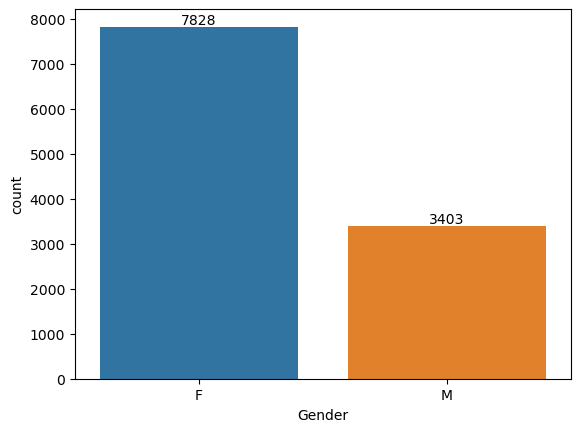

In [69]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [70]:
sales_gen=df.groupby(by='Gender')['Amount'].sum().sort_values(ascending=False).reset_index()

<Axes: xlabel='Gender', ylabel='Amount'>

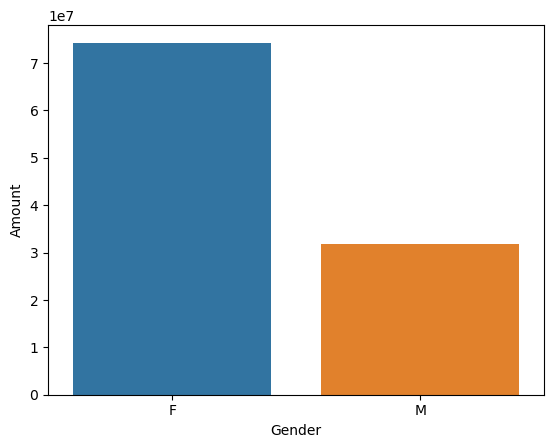

In [71]:
sns.barplot(x='Gender',y="Amount",data=sales_gen)


Observation:
From the above analysis,we see that most of the buyers are females and even their purchasing power is greater than males.

AGE

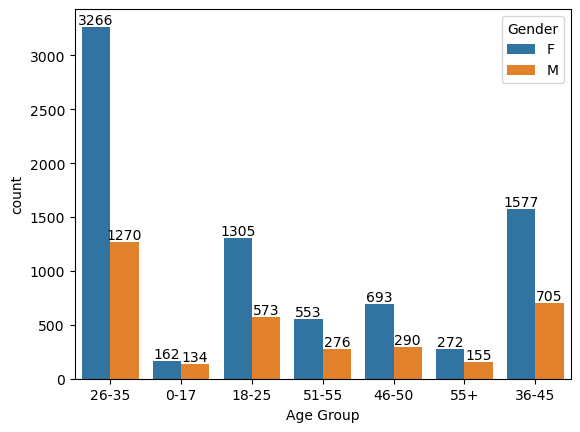

In [72]:
ax2=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax2.containers:
    ax2.bar_label(bars)

In [79]:
#total amount vs age group
sales_age=df.groupby(by='Age Group')['Amount'].sum().sort_values(ascending=False).reset_index()

<Axes: xlabel='Age Group', ylabel='Amount'>

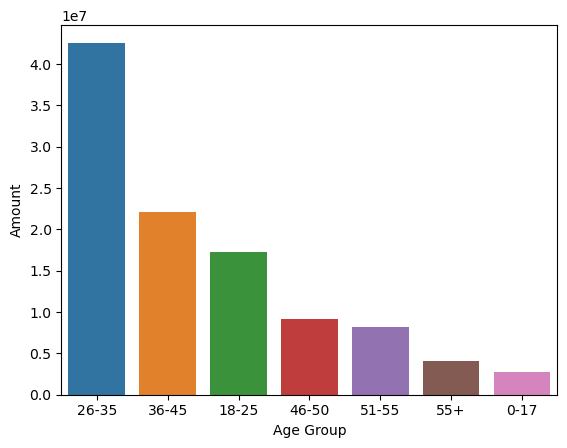

In [80]:
sns.barplot(x= 'Age Group',y='Amount', data=sales_age)

Observation:
Most of the buyers belong to the age group of 26-35

STATES

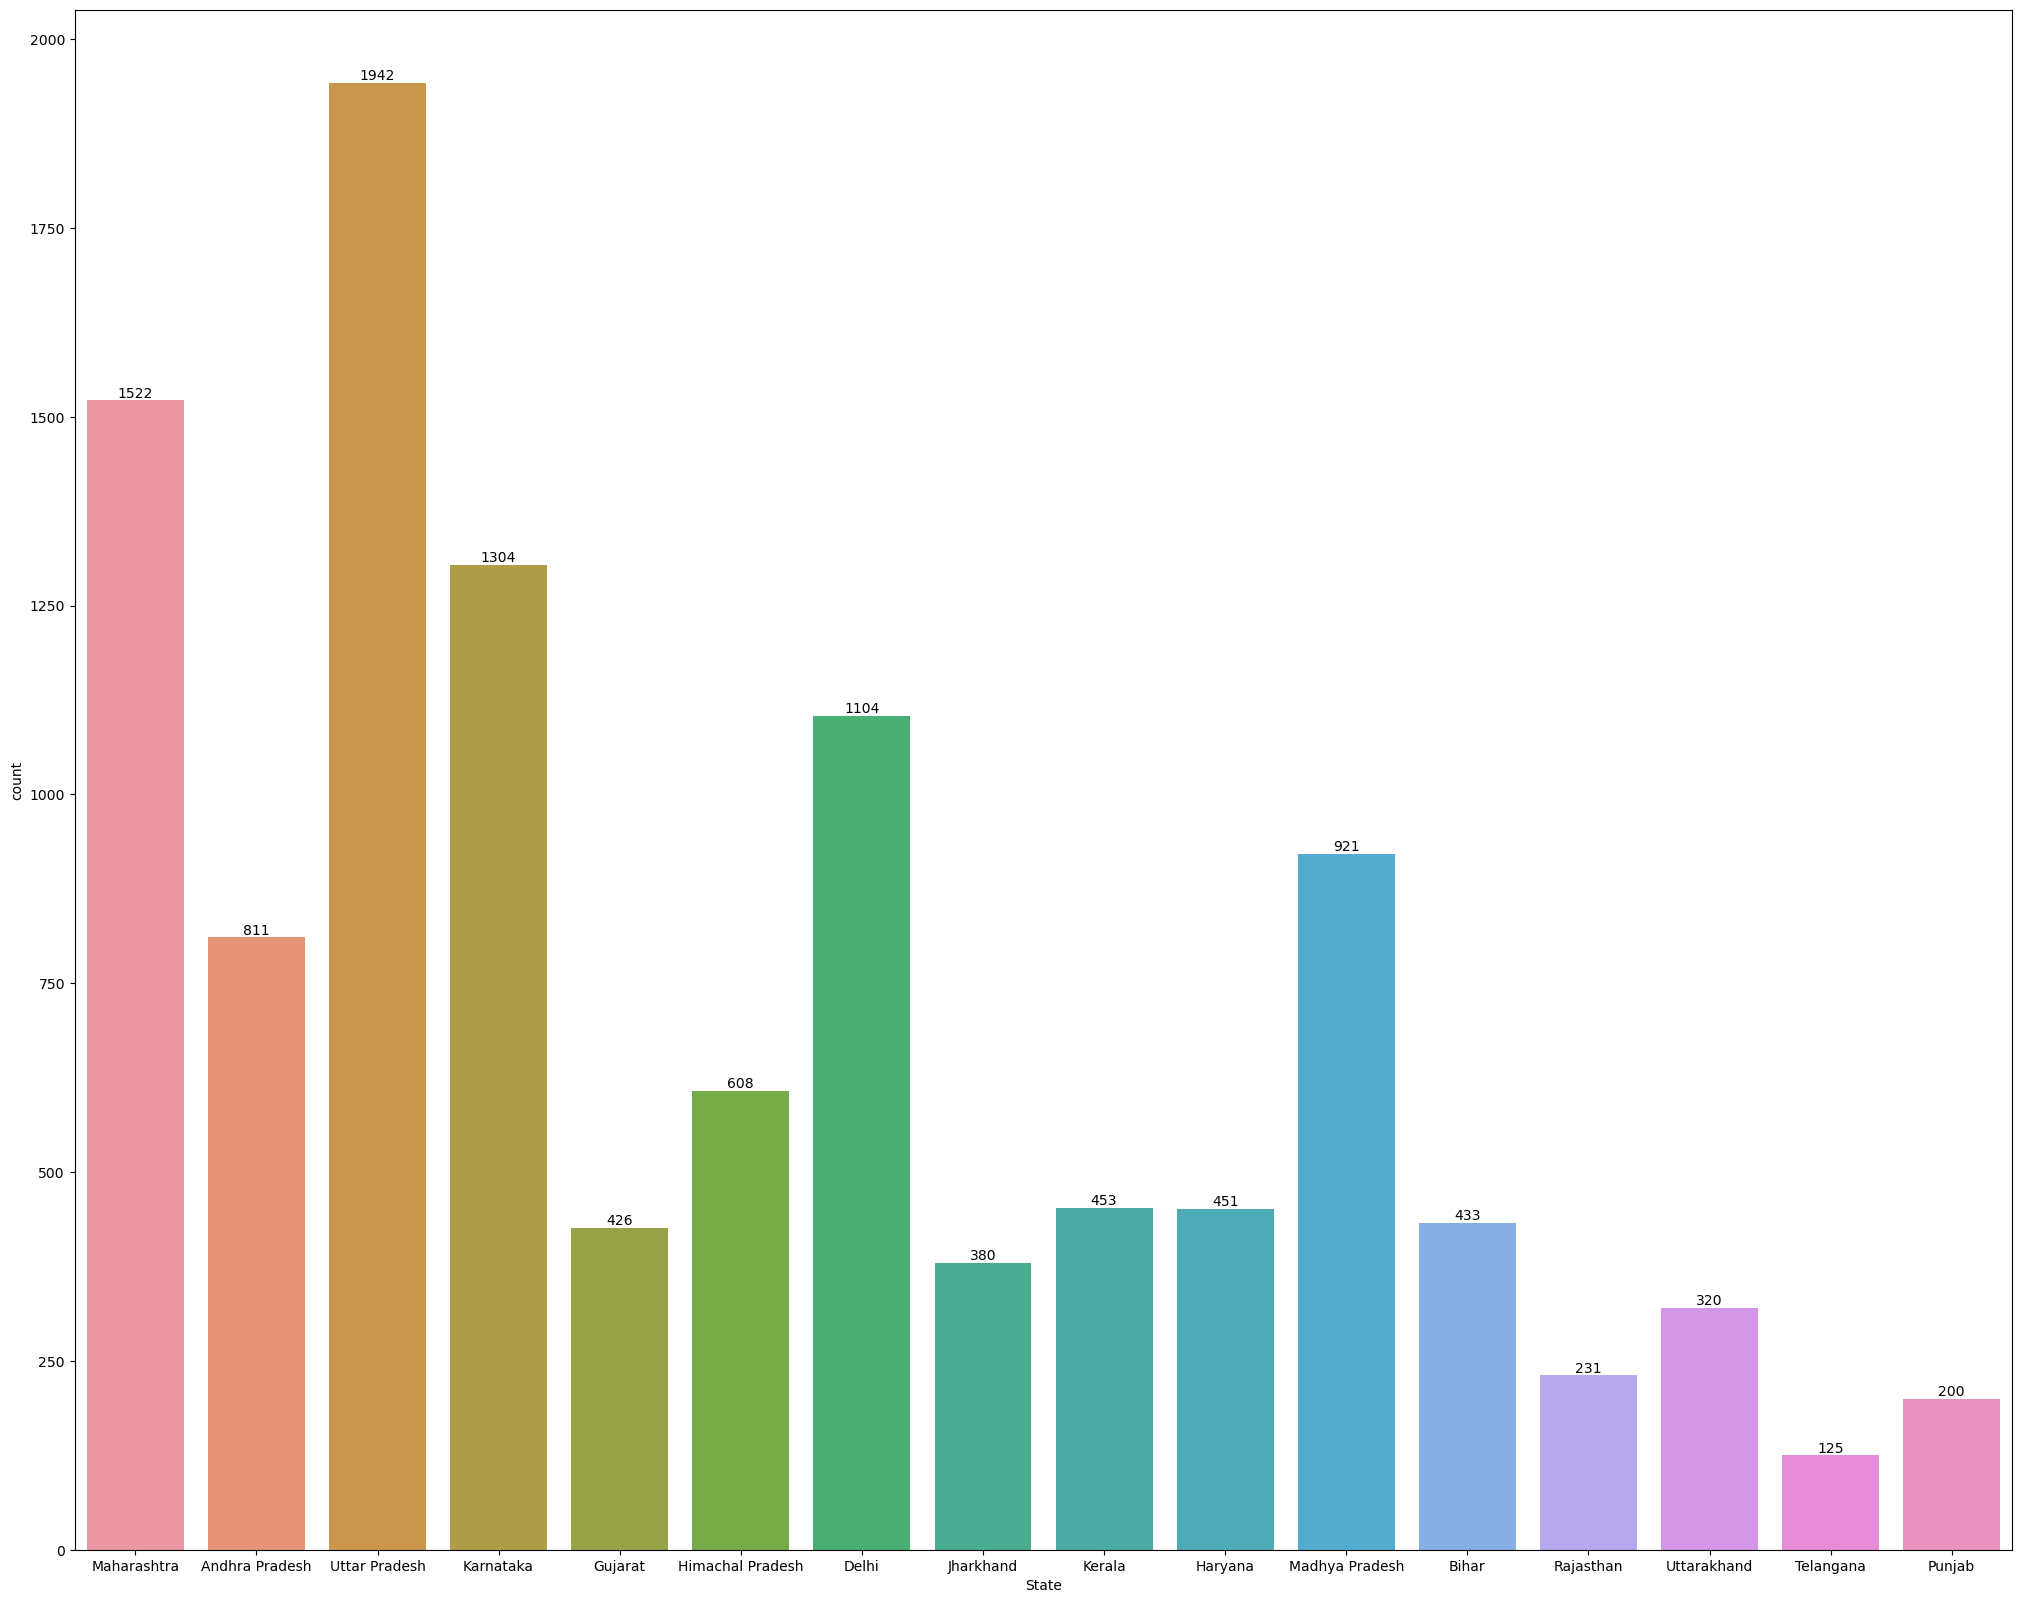

In [87]:
fig=plt.figure(figsize=(25,20))
ax1=sns.countplot(x='State',data=df)
for bars in ax1.containers:
    ax1.bar_label(bars)



In [97]:
#number of orders from top 10 states
states_salescount=df.groupby(by="State")['Orders'].count().sort_values(ascending=False).reset_index().head(10)

<Axes: xlabel='State', ylabel='Orders'>

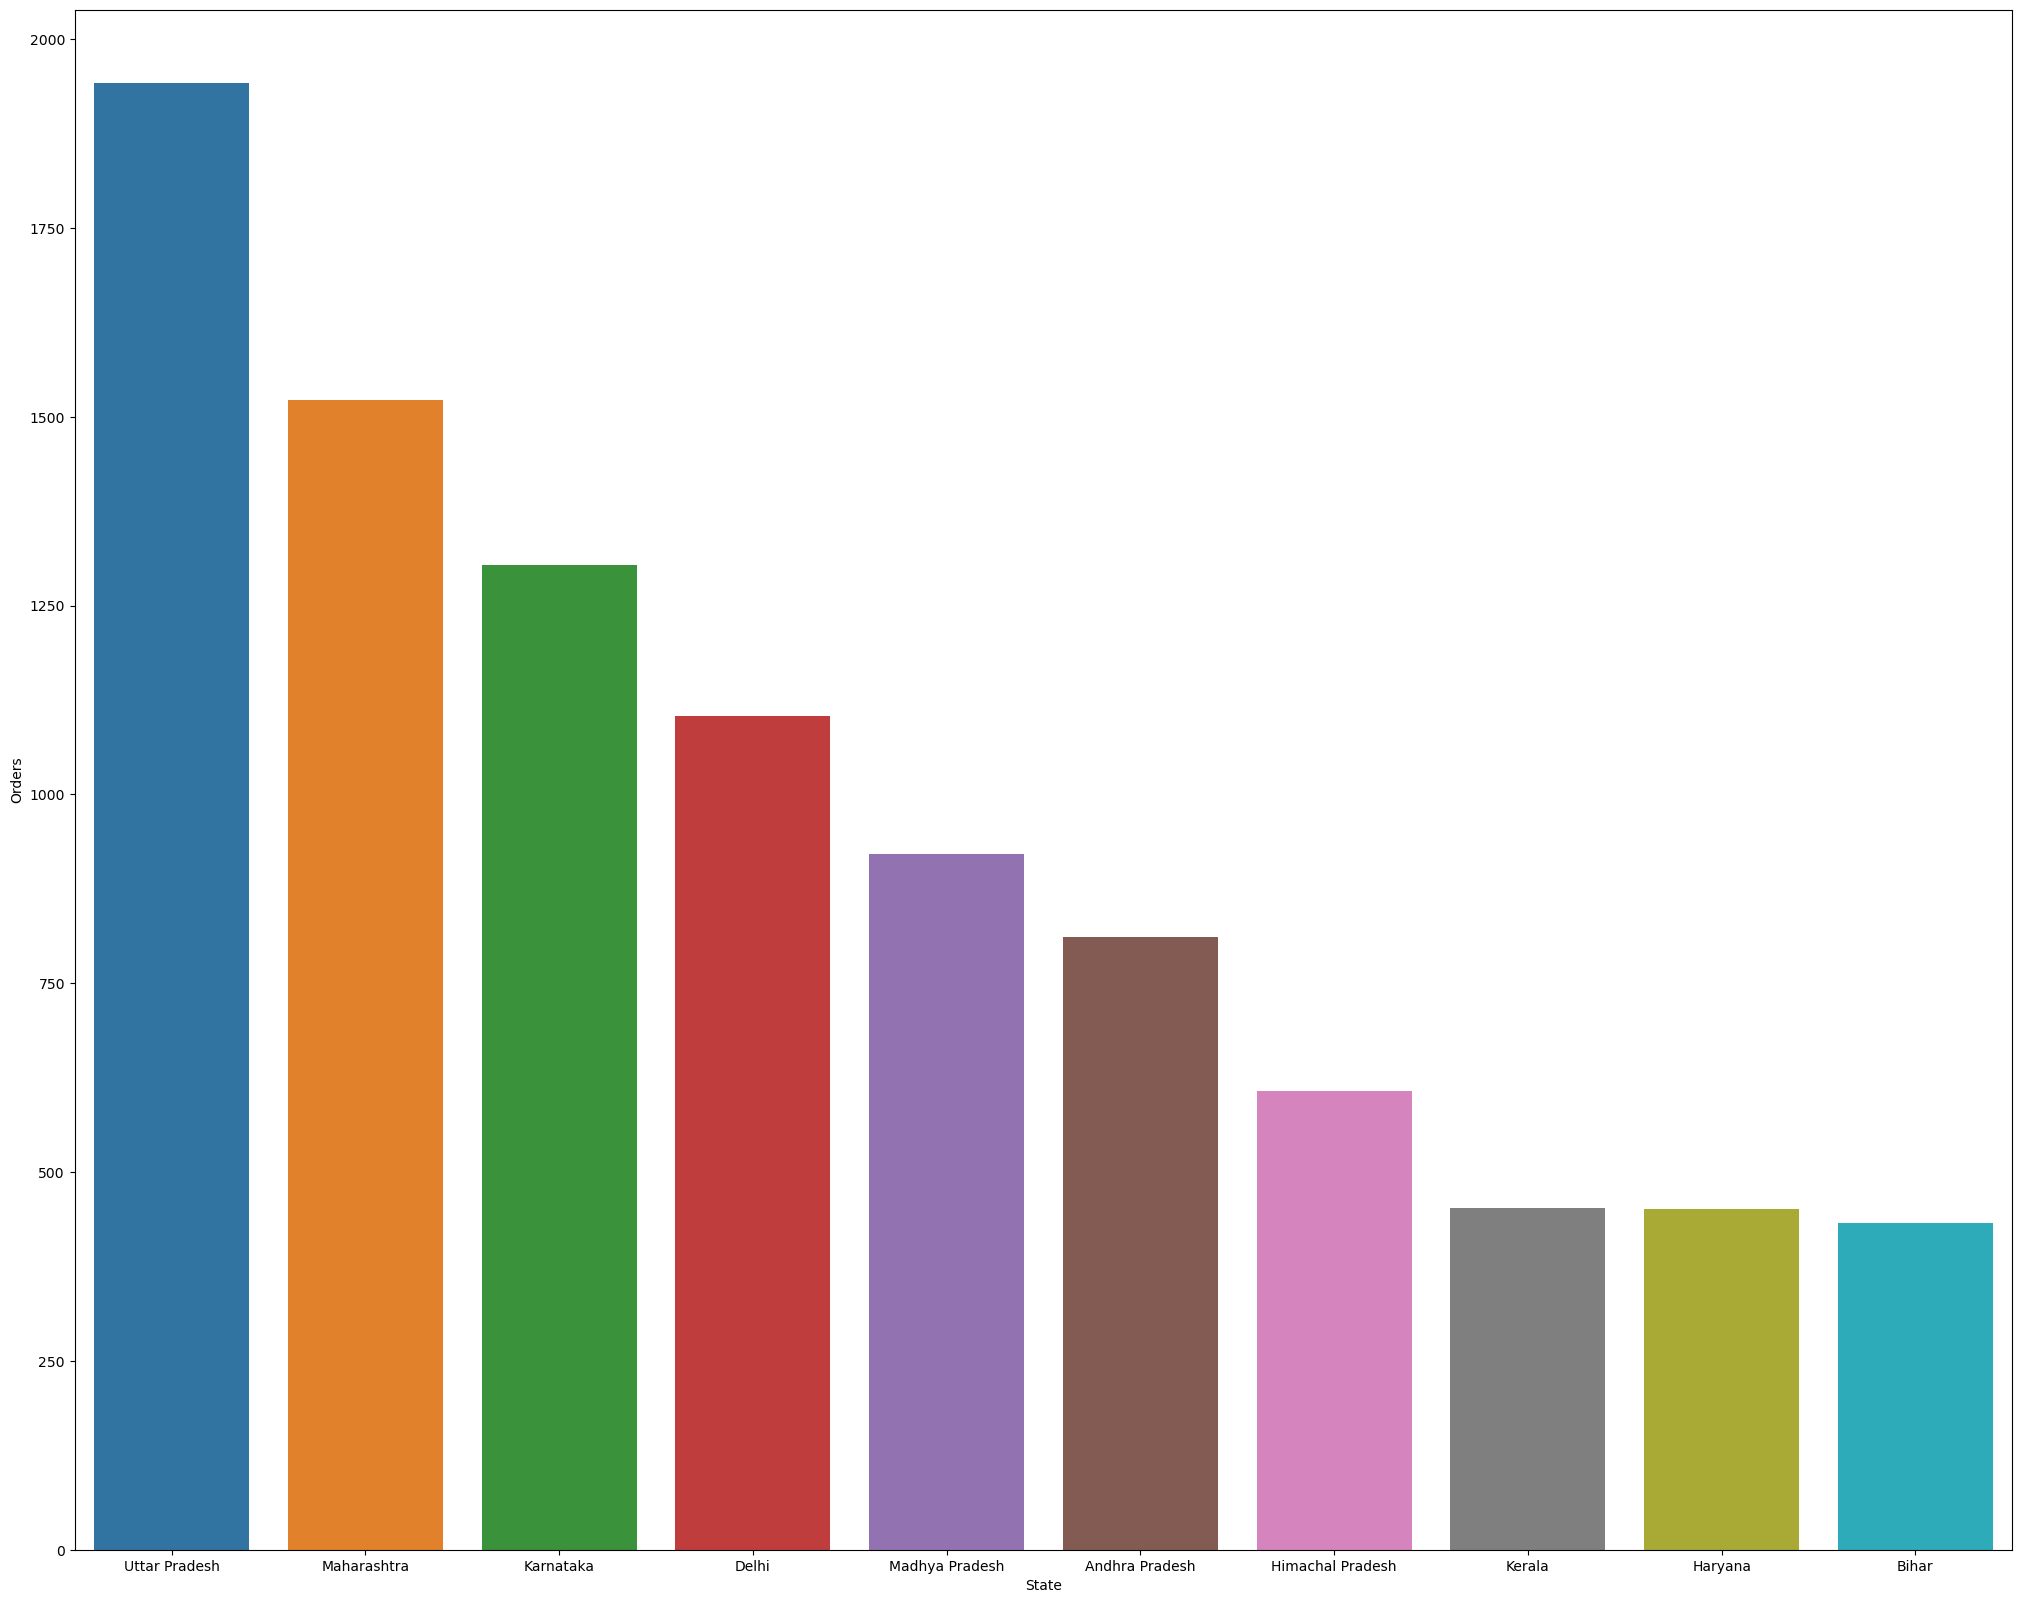

In [98]:
fig=plt.figure(figsize=(25,20))
sns.barplot(x='State',y='Orders',data=states_salescount)

In [99]:
#total amount from top 10 states
states_sales=df.groupby(by="State")['Amount'].sum().sort_values(ascending=False).reset_index().head(10)

<Axes: xlabel='State', ylabel='Amount'>

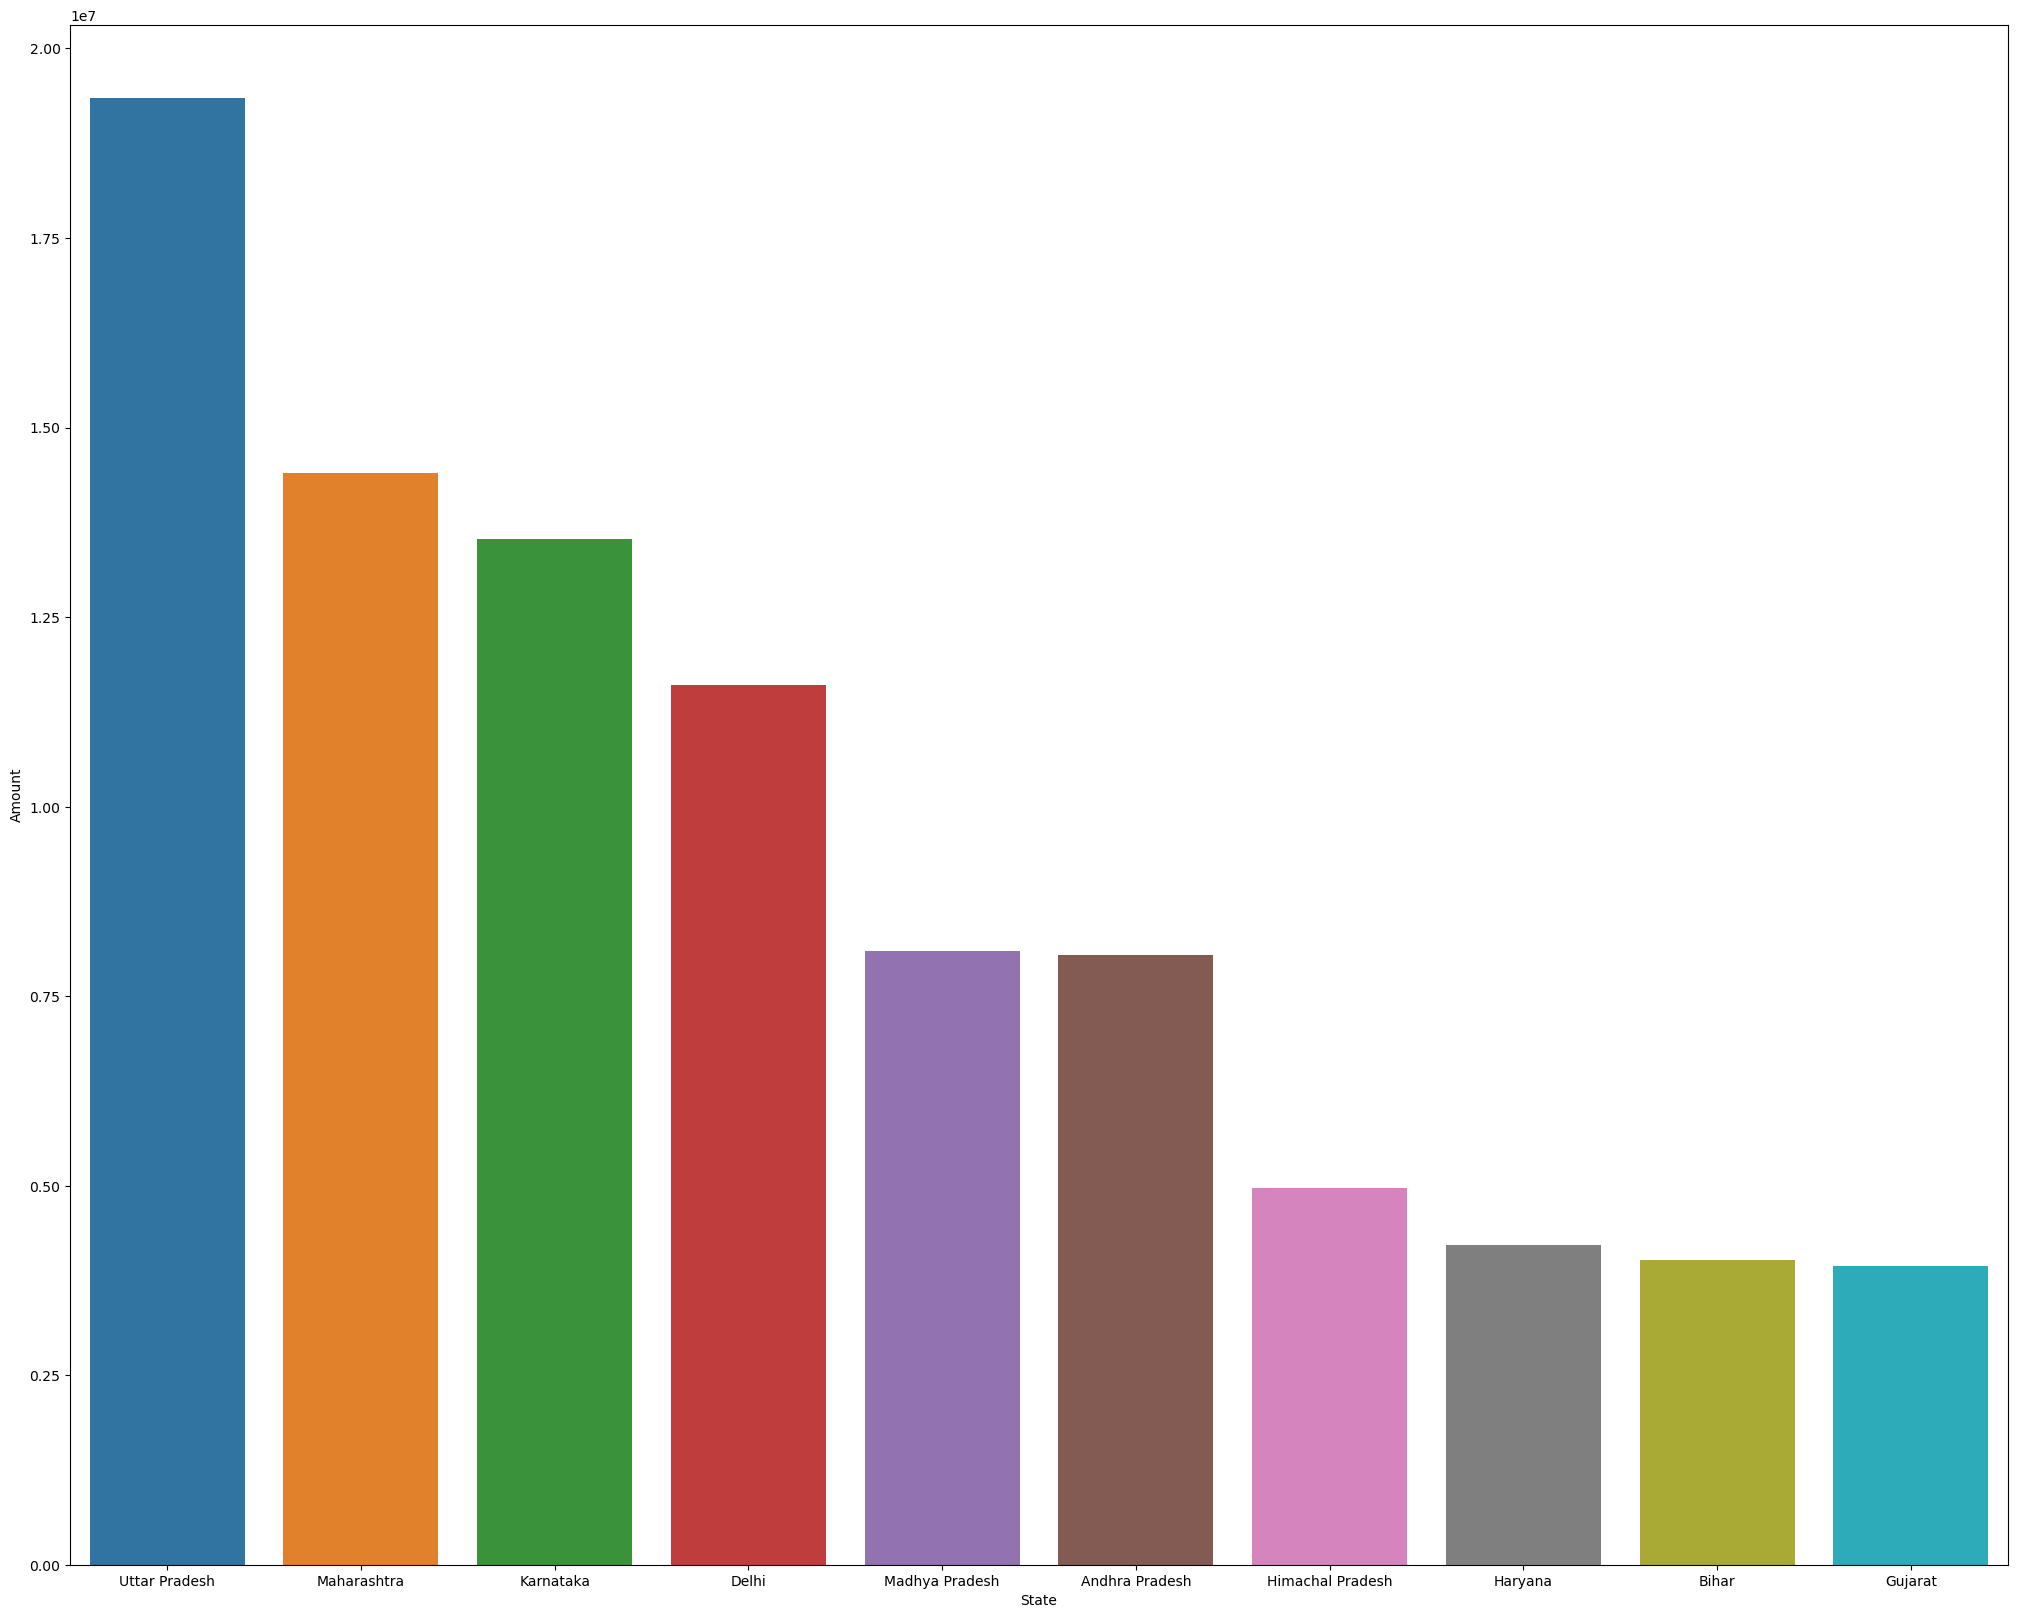

In [100]:
fig=plt.figure(figsize=(25,20))
sns.barplot(x='State',y='Amount',data=states_sales)

Observation:
mostly orders are from uttar pradesh,maharashtra,karnatka and delhi.

MARITAL STATUS


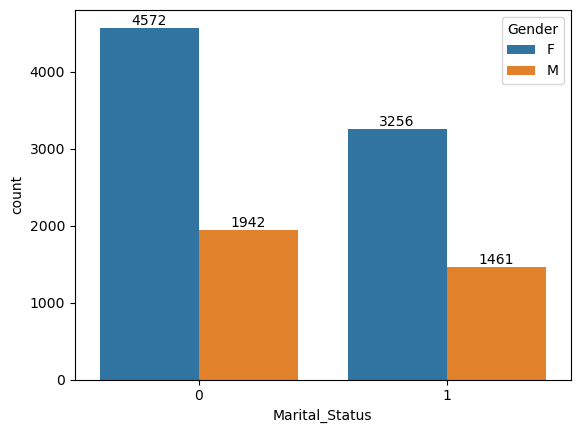

In [103]:
ax1=sns.countplot(x='Marital_Status',data=df,hue='Gender')
for bars in ax1.containers:
    ax1.bar_label(bars)

In [116]:
sales=df.groupby(by='Marital_Status')['Amount','Gender'].sum().sort_values(by='Amount',ascending=False).reset_index()
sales

C:\Users\neela\AppData\Local\Temp\ipykernel_14588\1789917299.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales=df.groupby(by='Marital_Status')['Amount','Gender'].sum().sort_values(by='Amount',ascending=False).reset_index()
C:\Users\neela\AppData\Local\Temp\ipykernel_14588\1789917299.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales=df.groupby(by='Marital_Status')['Amount','Gender'].sum().sort_values(by='Amount',ascending=False).reset_index()


,Marital_Status,Amount
0,0,62098734
1,1,44080091


<Axes: xlabel='Marital_Status', ylabel='Amount'>

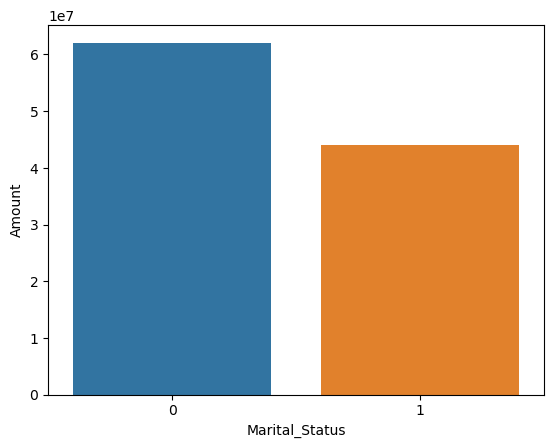

In [119]:
sns.barplot(x='Marital_Status',y='Amount',data=sales)

Observation:
most buyers are married 

OCCUPATION

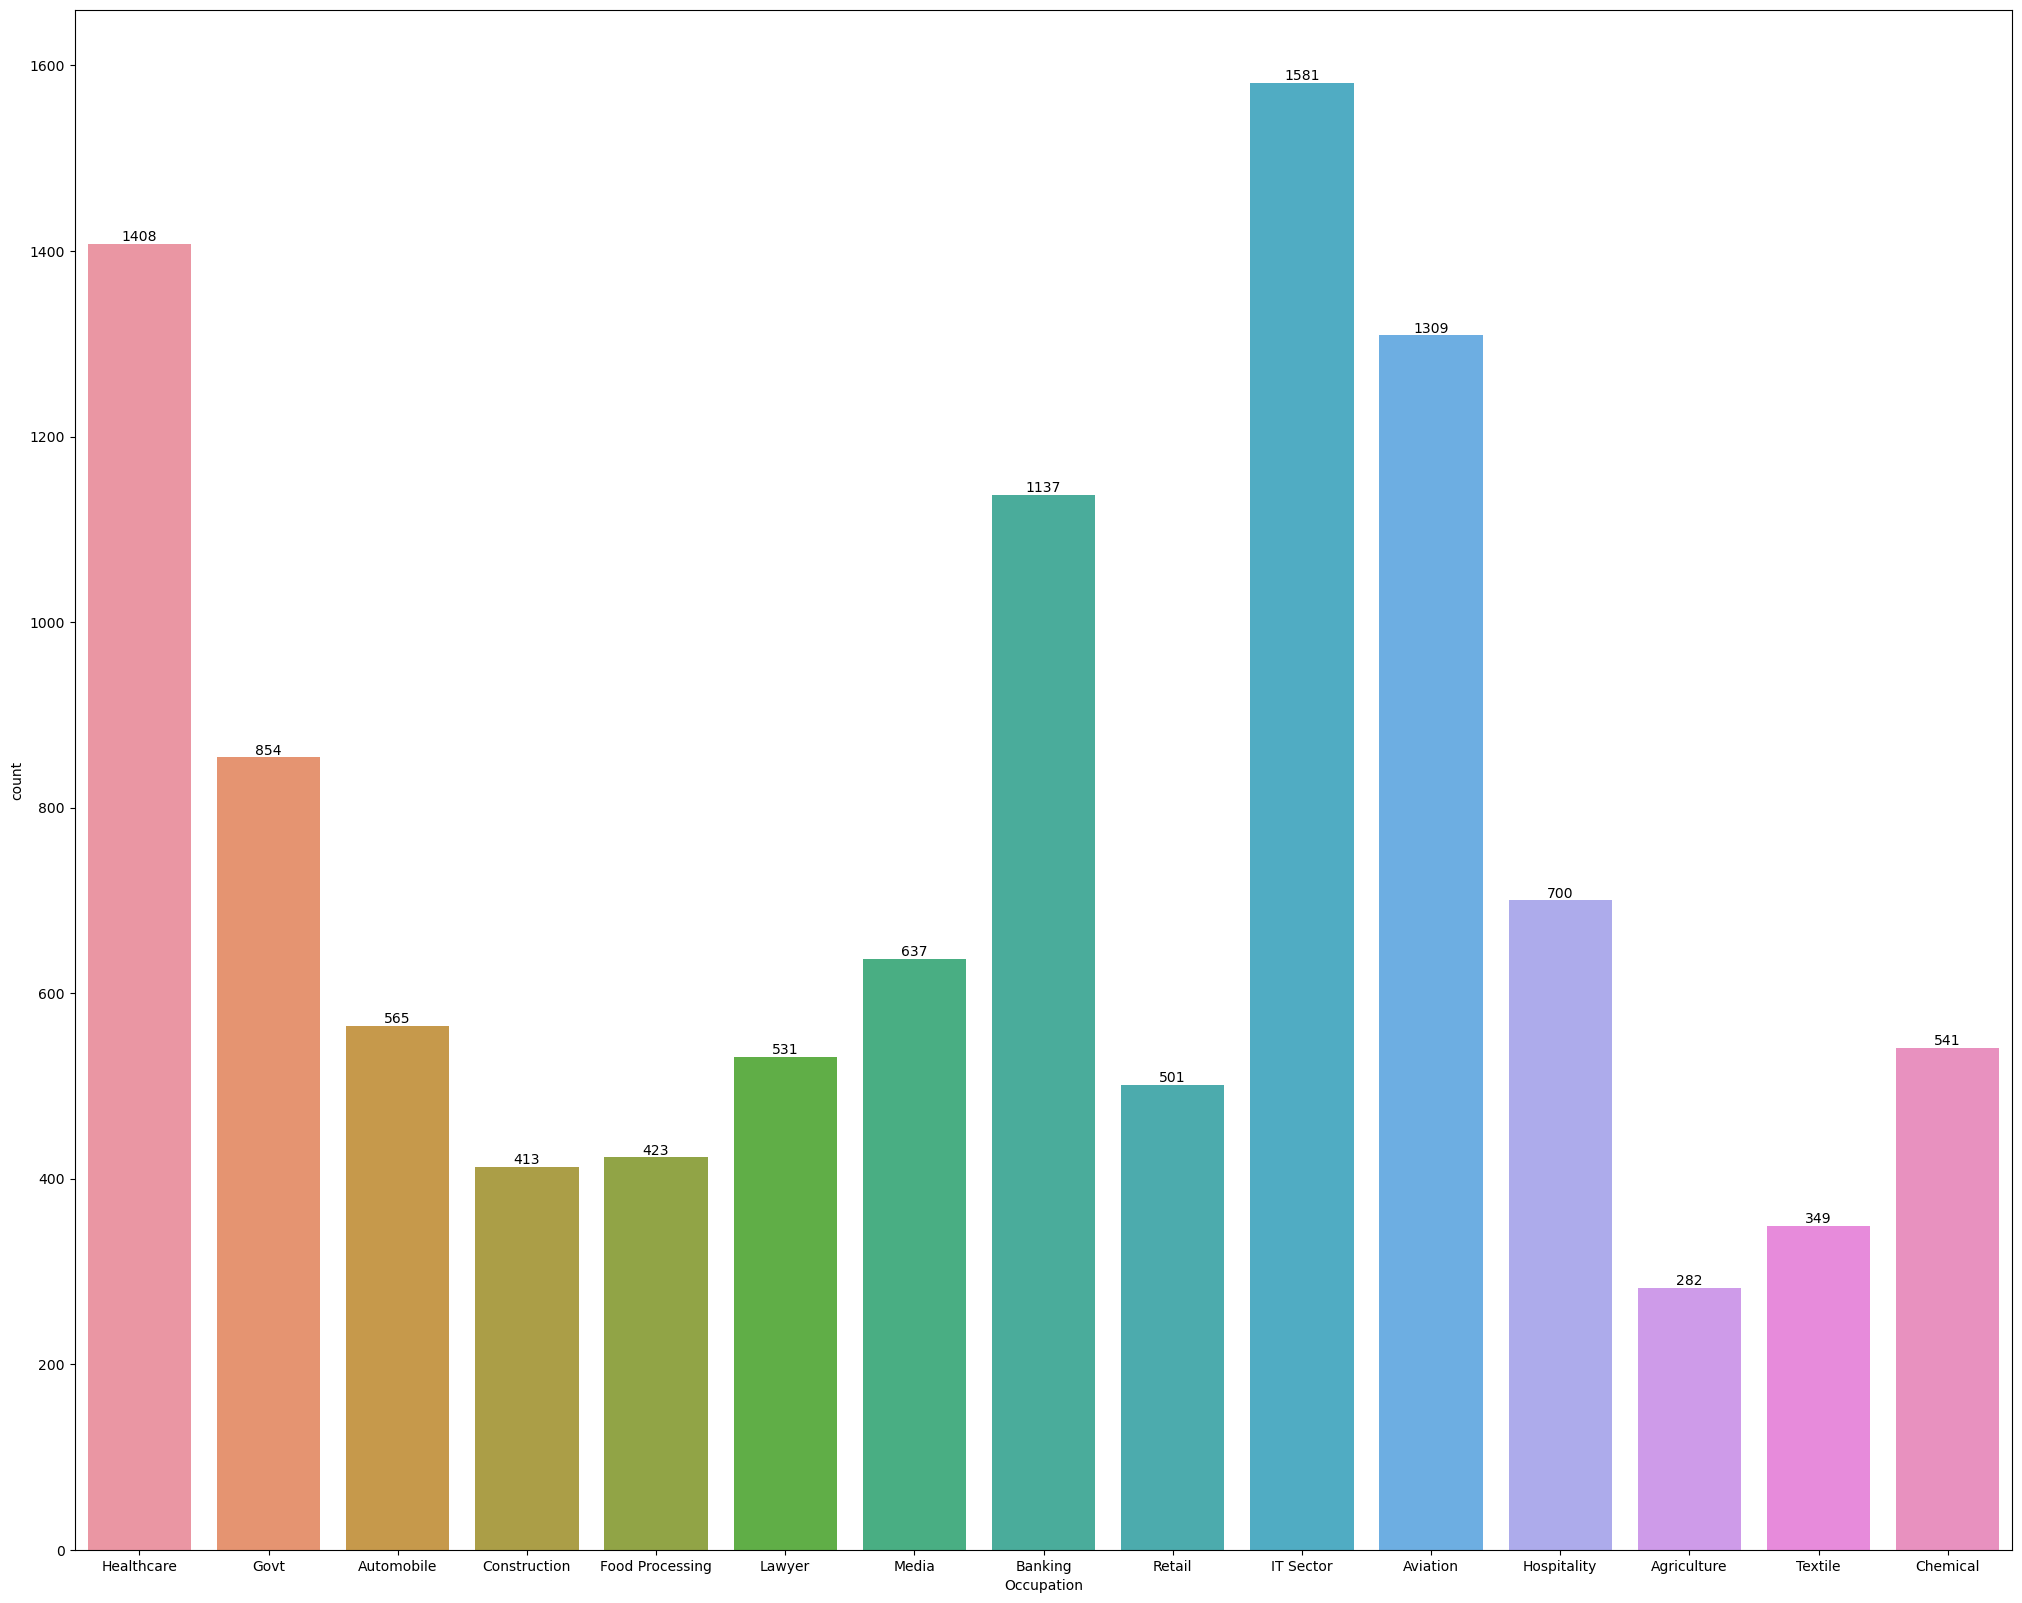

In [122]:
fig=plt.figure(figsize=(25,20))
ax1=sns.countplot(x='Occupation',data=df)
for bars in ax1.containers:
    ax1.bar_label(bars)

In [125]:
sales_occupation=df.groupby(by="Occupation")['Amount'].sum().sort_values(ascending=False).reset_index()

<Axes: xlabel='Occupation', ylabel='Amount'>

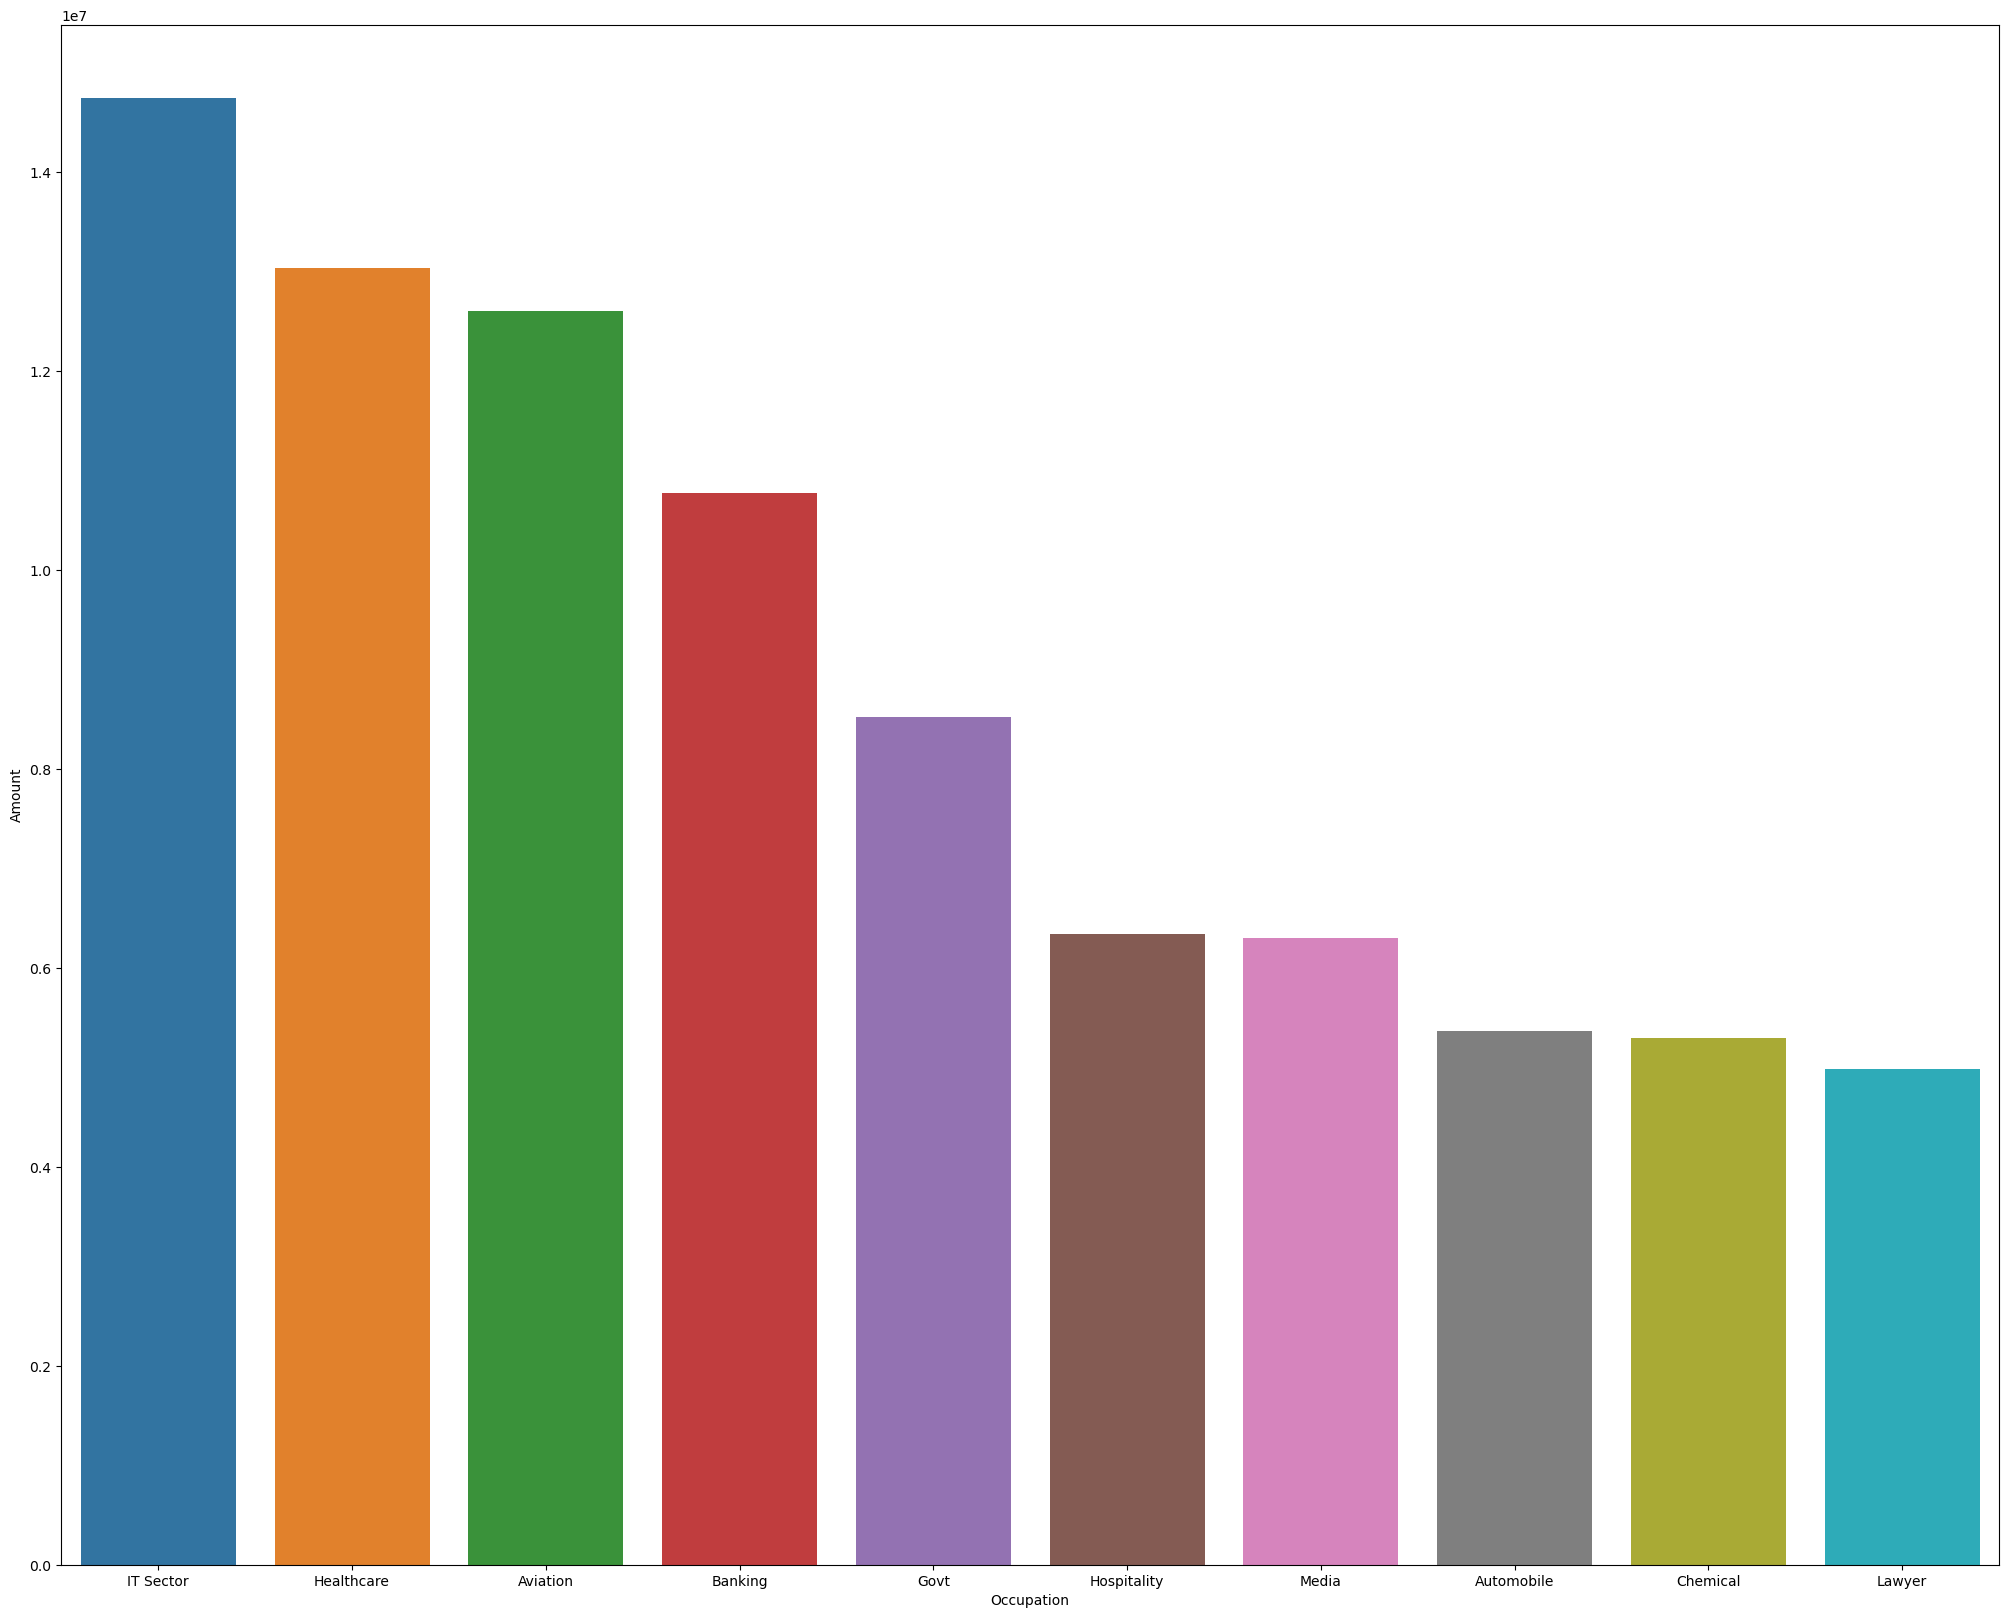

In [126]:
fig=plt.figure(figsize=(25,20))
sns.barplot(x='Occupation',y='Amount',data=sales_occupation)

Observation:
mostly buyers are working in IT sector,Healthcare,Aviation,Banking sectors


PRODUCT CATEGORY

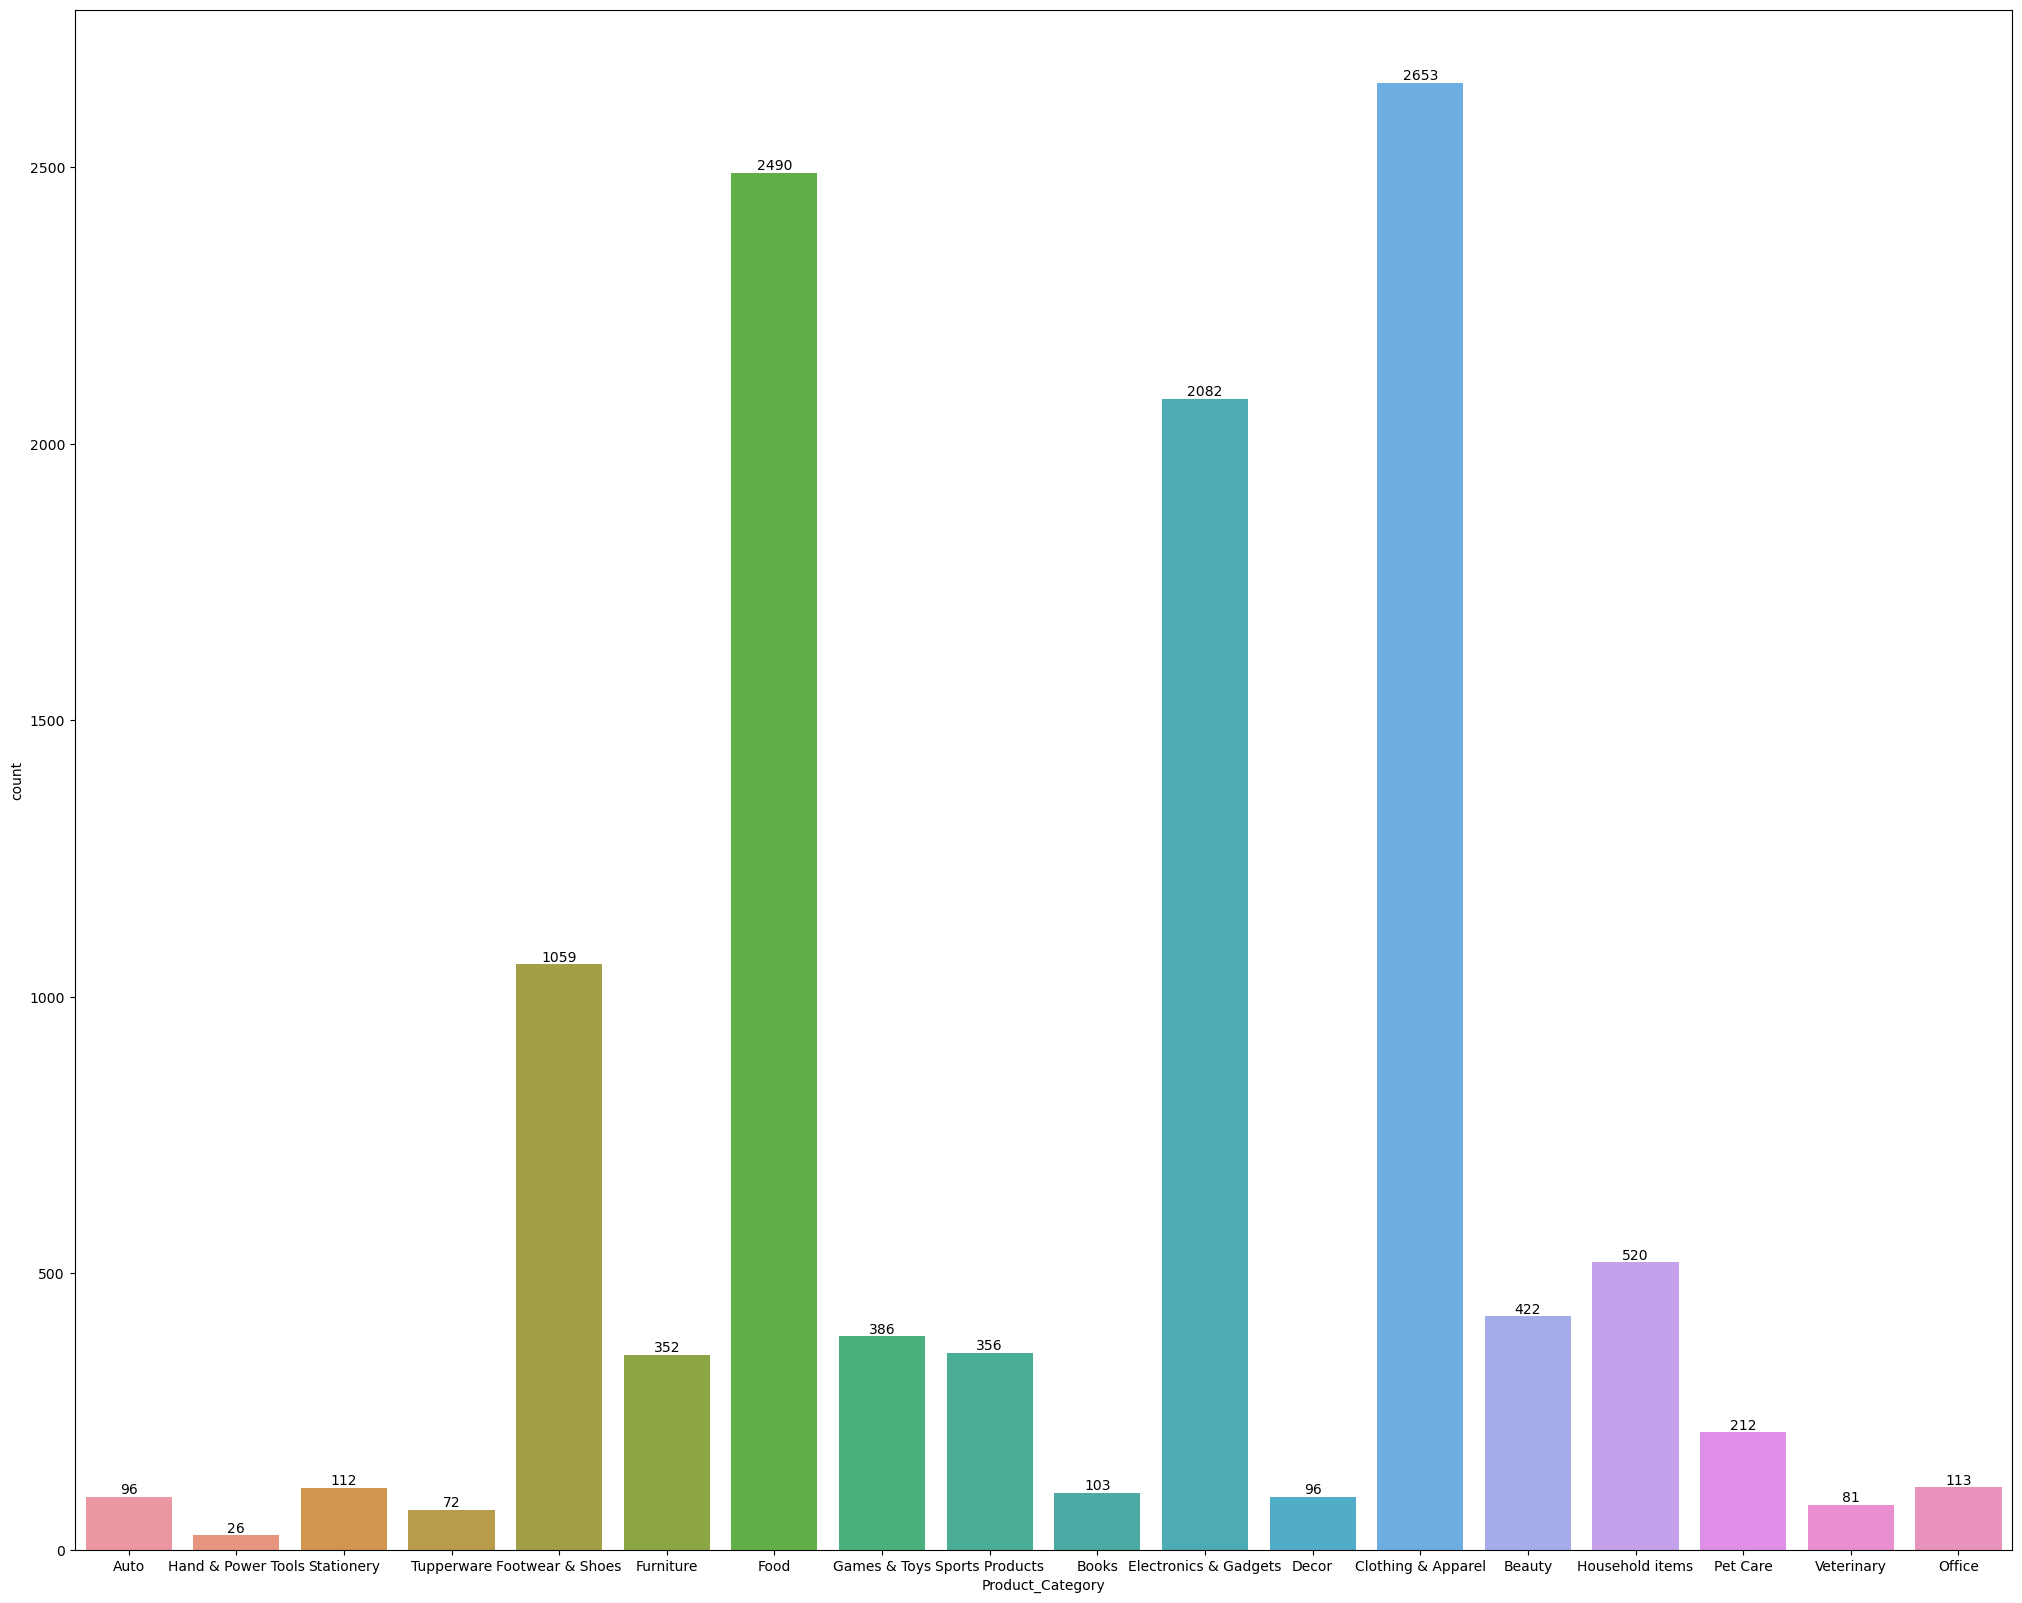

In [127]:
fig=plt.figure(figsize=(25,20))
ax1=sns.countplot(x='Product_Category',data=df)
for bars in ax1.containers:
    ax1.bar_label(bars)

In [128]:
sales_product=df.groupby(by="Product_Category")['Amount'].sum().sort_values(ascending=False).reset_index()

<Axes: xlabel='Product_Category', ylabel='Amount'>

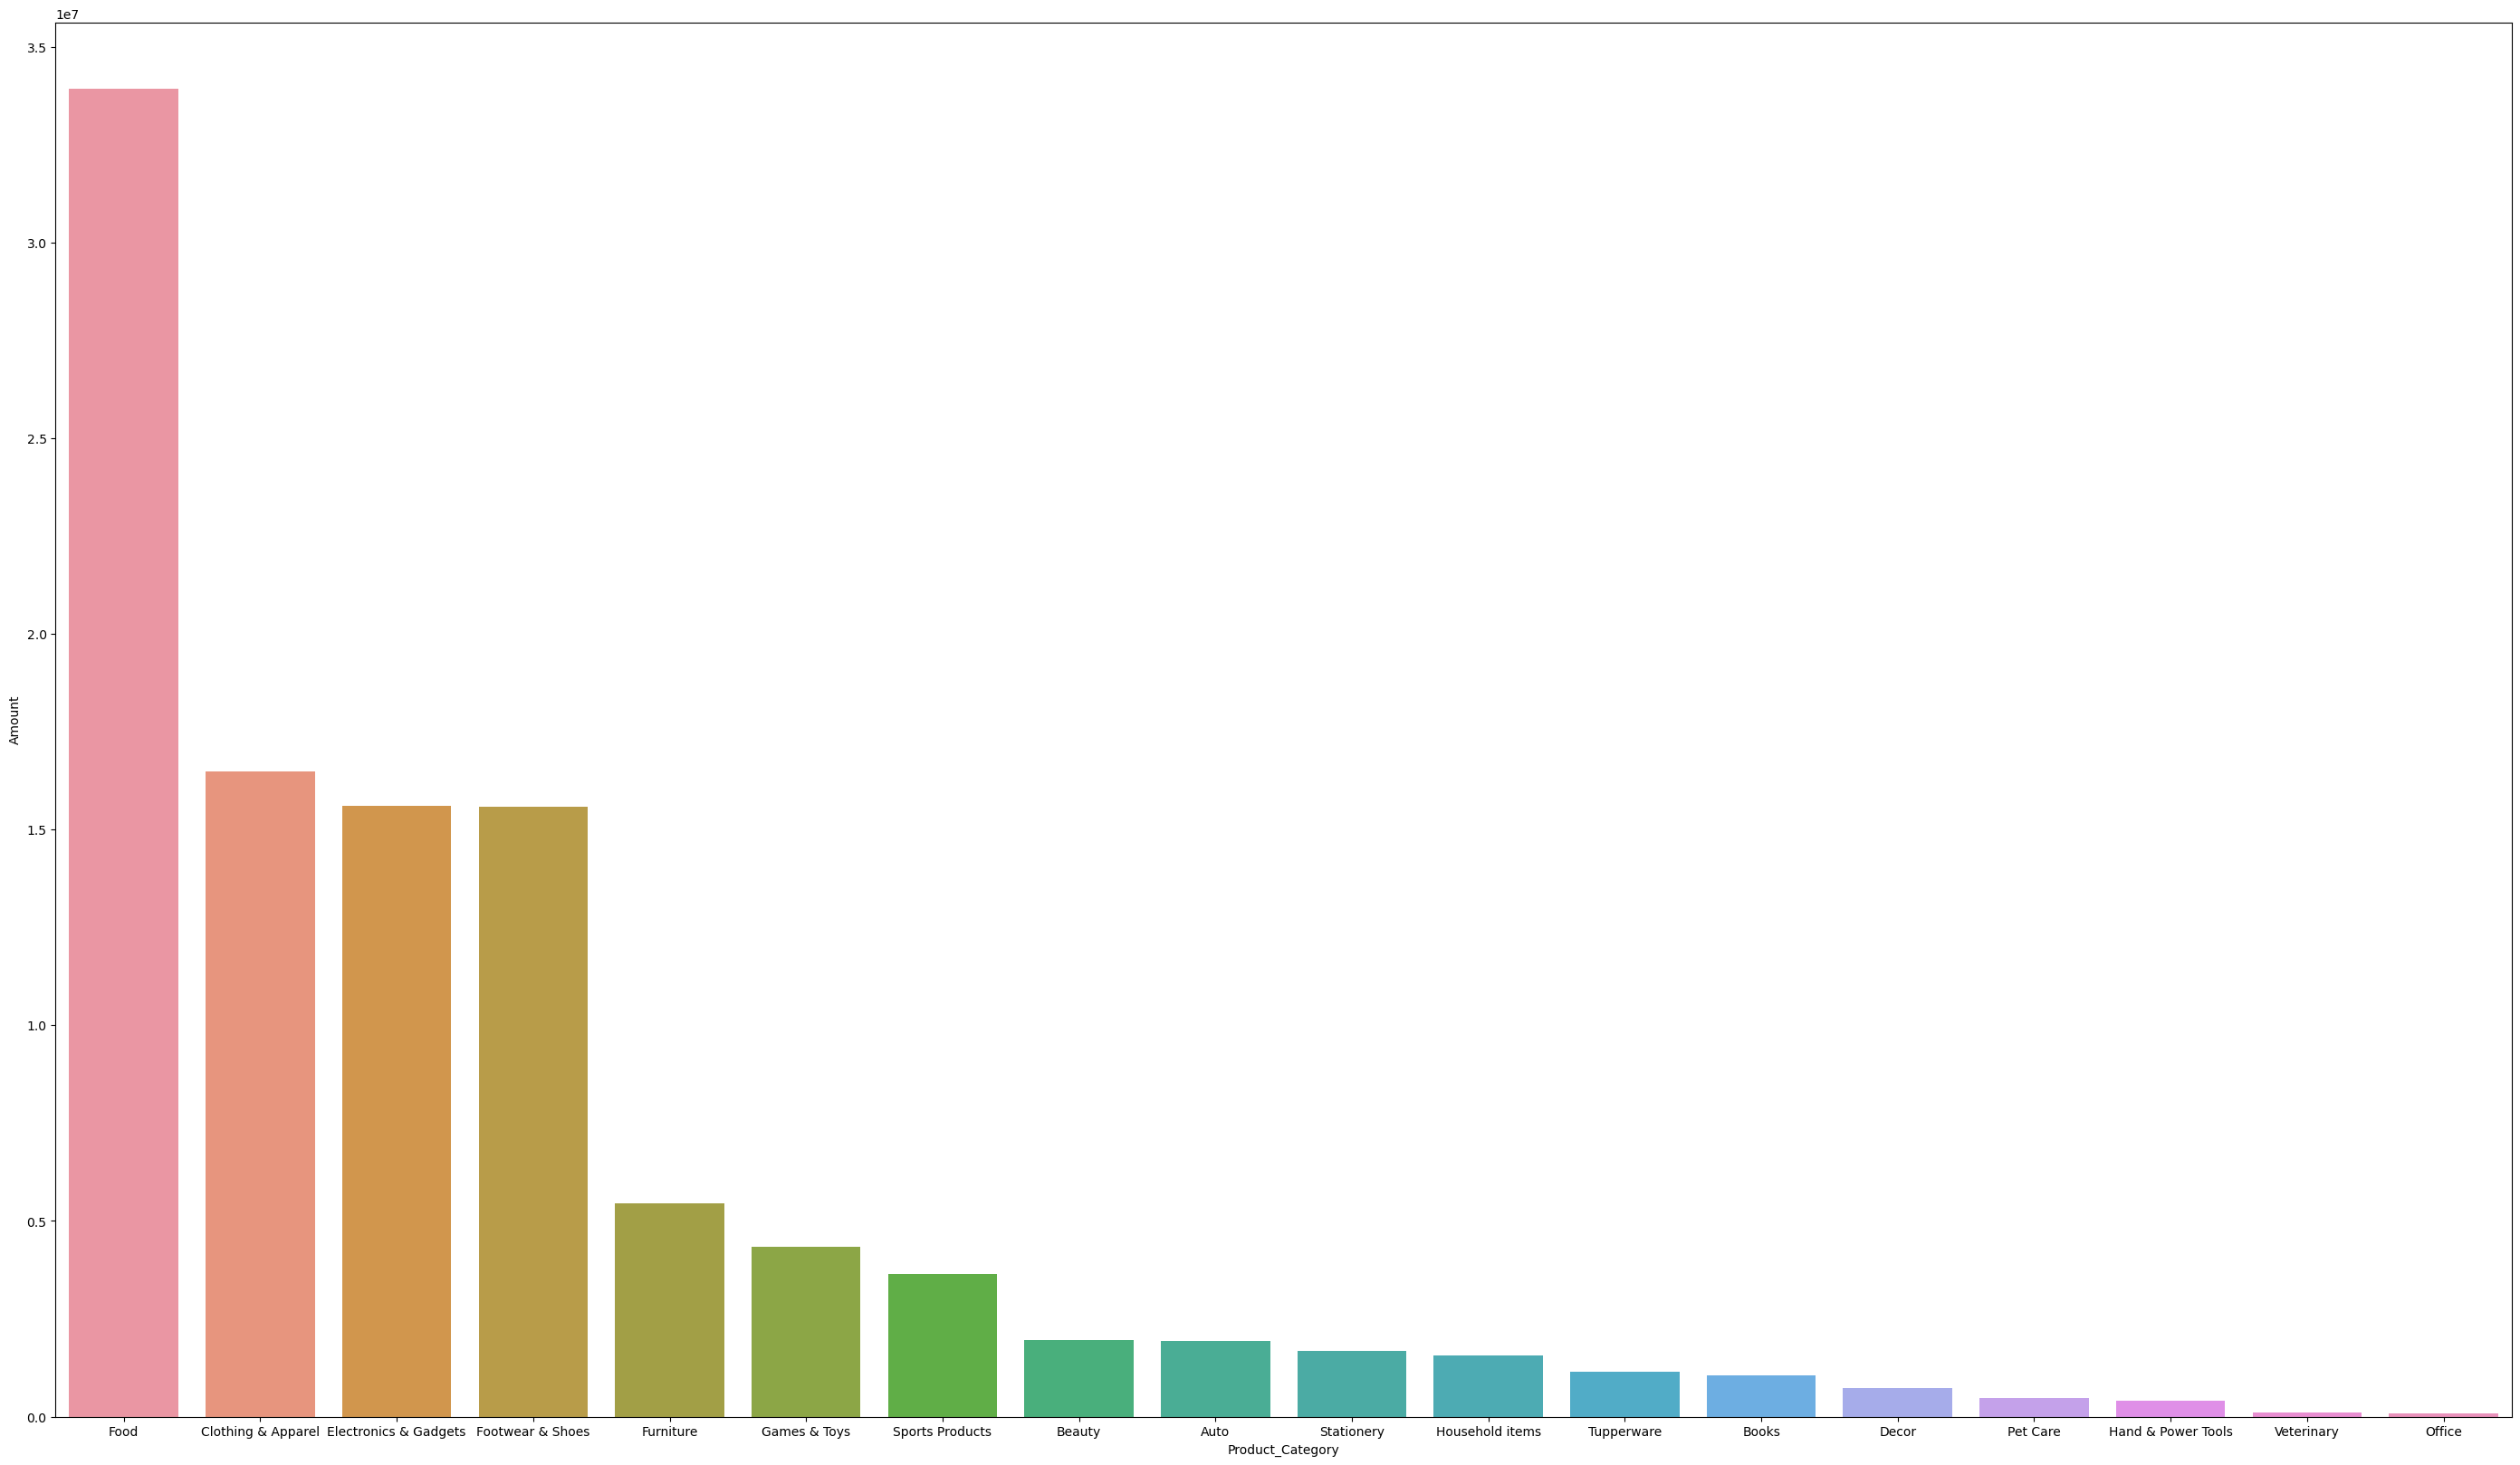

In [132]:
fig=plt.figure(figsize=(35,20))
sns.barplot(x='Product_Category',y='Amount',data=sales_product)

Observation:
Most amount of puchases are from category of food,clothingand apparel,electronics and gadgets and footwear and shoes

# CONCLUSION:
Most buyers are women of age group 26-35 yrs and belonging to the states UP,maharashtra,karnataka working in the fields of IT sector,healthcare,aviation,banking and are likely to buy from food,clothing and electronics category